In [2]:
import numpy as np
import matplotlib.pyplot as plt

## Functions to optimize

In [48]:
def f(x):
    return x**4 - 4*x**2 + 2*x

def df_f(x):
    return 4*x**3 - 8*x + 2

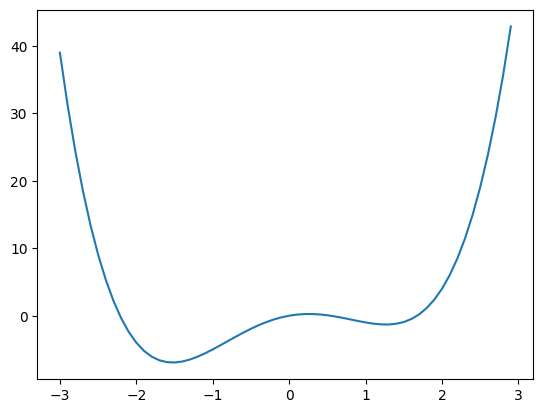

In [49]:
xs = np.arange(-3, 3, 0.1)
ys = [f(x) for x in xs]
plt.plot(xs, ys)
plt.show()

In [50]:
def banana(x, y):
    return (1-x)**2 + 100*(y - x**2)**2

def nabla_banana(x, y):
    return np.array([2*(x-1) - 400*x*(y - x**2), 200*(y - x**2)])

# def hesse_banana(x, y):
#     return np.array([[]])

def himmelblau(x, y):
    return (x**2 + y - 11)**2 + (x + y**2 - 7)**2

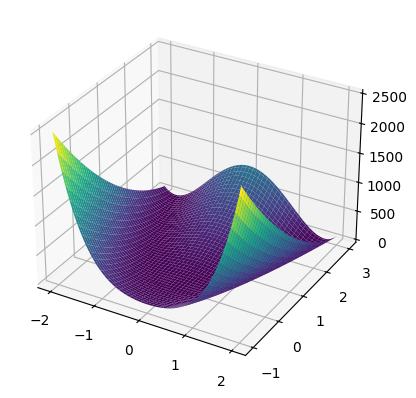

In [51]:
x = np.linspace(-2, 2, 100)
y = np.linspace(-1, 3, 100)
X, Y = np.meshgrid(x, y)
Z = banana(X, Y)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap='viridis')
plt.show()

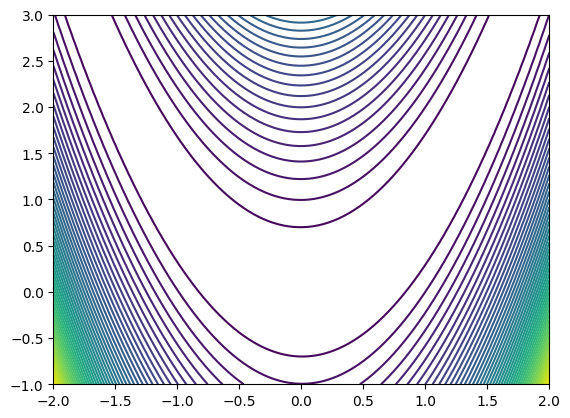

In [52]:
plt.contour(X,Y,Z,levels=50)
plt.show()

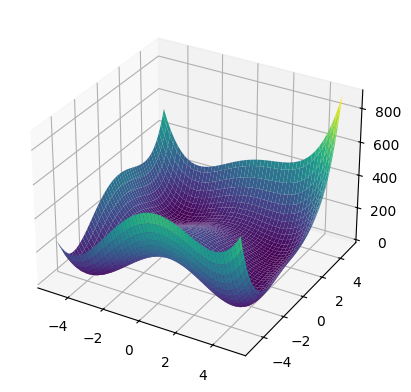

In [53]:
x = np.linspace(-5, 5, 100)
y = np.linspace(-5, 5, 100)
X, Y = np.meshgrid(x, y)
Z = himmelblau(X, Y)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap='viridis')
plt.show()

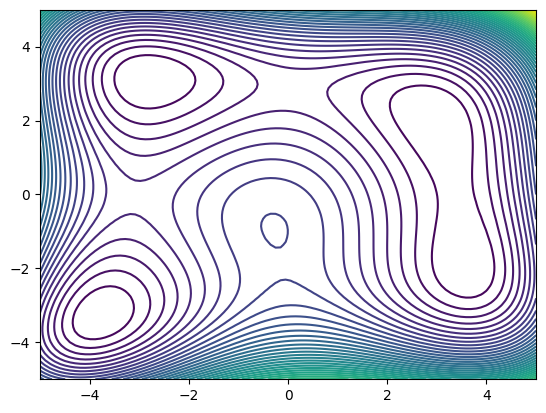

In [54]:
plt.contour(X,Y,Z, levels=50)
plt.show()

## 1d Newton's method

In [59]:
def newton_1d(func_f, x0, epsilon= 1e-5, max_iter=1000):
    xs = [x0]
    x = x0
    for i in range(max_iter):
        f = func_f(x)
        df_f = (func_f(x+epsilon) - func_f(x))/epsilon
        x = x - f/df_f
        xs.append(x)
        if abs(func_f(x)) < epsilon:
            return xs

In [82]:
x_newton = newton_1d(df_f, -3)
print(x_newton)

[-3, -2.1799970479988704, -1.7312614076682598, -1.5558362417127733, -1.5264879466479317, -1.525687701919988, -1.5256871208604916]


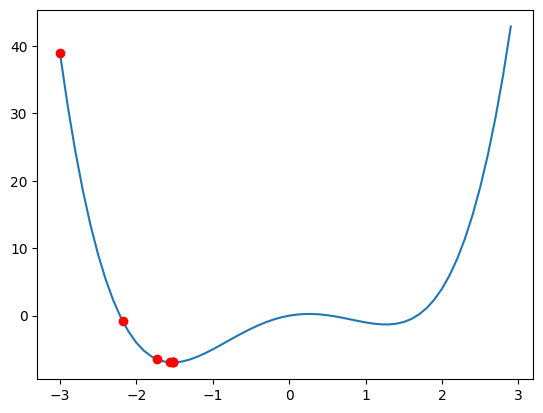

: 

In [83]:
xs = np.arange(-3, 3, 0.1)
ys = [f(x) for x in xs]
y_newton = [f(x) for x in x_newton]
plt.plot(xs, ys)
plt.plot(x_newton, y_newton, 'ro')
plt.show()

## 2d Newton's method

In [69]:
def newton_2d(func_f, x0, y0, epsilon=1e-5, max_iter=1000):
    xs = [x0]
    ys = [y0]
    x = x0
    y = y0
    for i in range(max_iter):
        f = func_f(x, y)
        df_f_x = (func_f(x+epsilon, y) - func_f(x, y))/epsilon
        df_f_y = (func_f(x, y+epsilon) - func_f(x, y))/epsilon
        x = x - f/df_f_x
        y = y - f/df_f_y
        xs.append(x)
        ys.append(y)
        if abs(func_f(x, y)) < epsilon:
            return xs, ys